Capstone - project 

<h1 align="center"> Lending Club Loan Data Analysis </h1> <br>

### EDA only:
Goal is to  explore this dataset of loans issued from 2007 to 2018 and understand which are the main features connected with predicting whether a customer will default.  <br><br>

Baseline:  Working with Numeric and Nonnumeric data.  No NLP techniques used. 

Addition: Create a separate model to Use NLP of text columns
Preprocess columns to to send to Word2Vec. Word embeddings are used. 


## Company Information:
Lending Club is a  peer to peer lending company (United States) 

1) Investors provide funds for potential borrowers. <br>
2) Investors earn a profit depending on the risk they take (the borrowers credit score. <br>
3) Lending Club provides the "bridge" between investors and borrowers. For more information please refer article below. <br><br>

<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>





<img src="http://echeck.org/wp-content/uploads/2016/12/Showing-how-the-lending-club-works-and-makes-money-1.png"><br><br>




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

import seaborn as sns
import sqlite3
from pandas.io import sql

#Plan
#Load the csv file to pandas
# clean it
### change kernel environment to conda:tf36


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics


## Environment Creation:




NEW environment created for tensor flow
1) Created new empty virtual environment called tf36 for tensorflow at the command prompt
2) Installed python = 36, 
3) Environment folders at user/pramodpaul/anaconda3/envs/tf36    (delete this tf36 if you have major issues with anaconda)
4) Environment.yml (yammer file contains the versions of the software)
5) Activate tf36
6) Restart machine
7) In Jupyter notebook, change kernel environment to conda:tf36
8) to install packages in this environment,use the below url
https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
Example:
#import sys
#!conda install --yes --prefix {sys.prefix} gensim
   

In [5]:
## Data Dictionary
##Please refer attached LCDataDictionary_preprocessing.xlsx   ### modified from original
#Lending Club - Peer to peer lending club company
#  Investors can invest in loans in varuous loan portfolio,  personal, home, 

In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} keras

In [1]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.test.utils import common_texts, get_tmpfile
from keras.preprocessing.text import Tokenizer

from sklearn import metrics
from keras.layers import *
from keras.models import *
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.initializers import *
from keras.optimizers import *
import keras.backend as K
from keras.callbacks import *
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from smart_open import smart_open
import datetime 
from keras.utils import multi_gpu_model

import os
import time
import gc
import re
import random
import keras

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
Using TensorFlow backend.


In [5]:
csv_file = 'loan.csv'
loans = pd.read_csv(csv_file, encoding = 'utf-8',delimiter = ',',low_memory= False)
# If you don't specify the type encoding as `utf-8`, you're going to have a difficult time when you try to convert to SQL.
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#list(temp_list);
Member_list = range(1,2260669,1)

In [89]:
list(Member_list);

In [80]:
loans['member_id'] = list(Member_list)

In [11]:
loans.shape

(2260668, 145)

## Performing vs Non-Performing loans
## Fully paid loans 
<a id="Fully_paid"></a>
#Fully_paid

In [11]:

Fully_paid_list = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
Rest_list = ['Current',  'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Charged Off']

In [98]:
### Data that we are looking at
data = loans[loans['loan_status'].isin(Rest_list)]

In [13]:
data.shape

(1216728, 145)

In [99]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,1,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
loans.id.unique()

array([nan])

In [38]:
investor_loan_diff = data[data['funded_amnt'] != data['funded_amnt_inv']]

In [55]:
investor_loan_diffGT3000 = data[data['funded_amnt'] - data['funded_amnt_inv'] > 3000]

In [56]:
investor_loan_diffGT3000.shape
### for now drop 'funded_amnt_inv'  - amount invested by investors into the loan ..as the company has to fully fund the amount.

(733, 145)

In [40]:
investor_loan_diff.shape

(61041, 145)

In [90]:
#investor_loan_diff;

NameError: name 'investor_loan_diff' is not defined

In [91]:
#loans.loan_status.unique()

In [92]:
#loans.loan_status.value_counts()

In [94]:
#data.loan_status.value_counts()

## Performing vs NonPerforming_loans
<b>Performing_vs_NonPerforming_loans</b><br>
<a id="Performing_vs_NonPerforming_loans"></a>
#Performing_vs_NonPerforming_loans

## Performing loans
1) Current <br><br>


## NON PERFORMING LOANS for investors
1) Default <br>
2) Charged Off <br>
3) Does not meet the credit policy. Status:Charged Off <br>
4) In Grace Period <br>
5) Late (31-120 days) <br> 
6) Late (16-30 days) <br><br>

In [95]:

### NON PERFORMING LOANS for investors
#default_list = ["Default","Charged Off","Does not meet the credit policy. Status:Charged Off"]
#  include one in grace period also...but loan has already defaulted
default_list = ["Default","Charged Off",'Does not meet the credit policy. Status:Charged Off','In Grace Period',
                'Late (31-120 days)','Late (31-120 days)']


In [100]:
default = data[data['loan_status'].isin(default_list)]

In [244]:
default.shape

(293296, 145)

In [101]:
#loans[loans['loan_status'] == "Default"].count()    #####loans[mask]
### 31 
default.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1777,NaN,1778,20975,20975,20975.0,36 months,8.19,659.13,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3203,NaN,3204,20000,20000,20000.0,36 months,11.80,662.38,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3677,NaN,3678,9100,9100,9100.0,36 months,26.31,368.15,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4022,NaN,4023,3525,3525,3525.0,36 months,25.34,140.79,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4195,NaN,4196,11000,11000,11000.0,60 months,16.91,272.85,C,C5,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
default.loan_status.count()    #### 31 defaults out of 7259 loans out of 2260668 observations

293296

In [102]:
# Loan_condition = 1,  Good or performing loan   .....WILL NOT DEFAULT
# Loan_condition = 0,  Bad or non-performing loan ....MAY DEFAULT


# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


data['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 0
    else:
        return 1
        
data['loan_condition'] = data['loan_status'].apply(loan_condition)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [103]:
data.loan_status.unique()

array(['Current', 'Late (31-120 days)', 'In Grace Period', 'Charged Off',
       'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [104]:
def loan_status_InGracePeriod(status):
    if status == 'In Grace Period':
        return 1
    else:
        return 0
    
data['loan_status_InGracePeriod'] = data['loan_status'].apply(loan_status_InGracePeriod)

def loan_status_ChargedOff(status):
    if status == 'Charged Off':
        return 1
    else:
        return 0
    
data['loan_status_ChargedOff'] = data['loan_status'].apply(loan_status_ChargedOff)


def loan_status_DMC_ChargedOff(status):
    if status == 'Does not meet the credit policy. Status:Charged Off':
        return 1
    else:
        return 0
    
data['loan_status_DMC_ChargedOff'] = data['loan_status'].apply(loan_status_DMC_ChargedOff)






/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [105]:
data['loan_status_InGracePeriod'].value_counts()

0    1207776
1       8952
Name: loan_status_InGracePeriod, dtype: int64

In [106]:
def loan_status_current(status):
    if status == 'Current':
        return 1
    else:
        return 0
    
data['loan_status_current'] = data['loan_status'].apply(loan_status_current)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [107]:
data['loan_status_current'].unique()

array([1, 0])

In [114]:
data['loan_status_Late16to30days'].unique()

array([0, 1])

In [113]:
def loan_status_Late16to30days(status):
    if status == 'Late (16-30 days)':
        return 1
    else:
        return 0

    
    
data['loan_status_Late16to30days'] = data['loan_status'].apply(loan_status_Late16to30days)   
    

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [110]:
def loan_status_Late31to120days(status):
    if status == 'Late (31-120 days)':
        return 1
    else:
        return 0    

    
data['loan_status_Late31to120days'] = data['loan_status'].apply(loan_status_Late31to120days)


/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
data['loan_status_Late31to120days'].unique()

array([0, 1])

In [29]:
#Performing_loans...are the Currentloans ..

data['loan_condition'].dtypes

dtype('float64')

In [38]:
data_g = data.groupby(['issue_d','loan_status']).count()

In [37]:
data_g

id  member_id  \
issue_d  loan_status                                                         
Apr-2008 Charged Off                                          0         27   
         Does not meet the credit policy. Status:Charged...   0         36   
Apr-2009 Charged Off                                          0         40   
         Does not meet the credit policy. Status:Charged...   0          9   
Apr-2010 Charged Off                                          0         82   
         Does not meet the credit policy. Status:Charged...   0         19   
Apr-2011 Charged Off                                          0        222   
Apr-2012 Charged Off                                          0        496   
Apr-2013 Charged Off                                          0       1504   
Apr-2014 Charged Off                                          0       3314   
         Current                                              0        942   
         In Grace Period                                      0         12   
         Late (16-30 days)                                    0          5   
         Late (31-120 days)                                   0         28   
Apr-2015 Charged Off                                          0       6484   
         Current                                              0       3620   
         In Grace Period                                      0         42   
         Late (16-30 days)                                    0         22   
         Late (31-120 days)                                   0        100   
Apr-2016 Charged Off                                          0       6050   
         Current                                              0      12845   
         Default                                              0          2   
         In Grace Period                                      0        177   
         Late (16-30 days)                                    0         52   
         Late (31-120 days)                                   0        361   
Apr-2017 Charged Off                                          0       2955   
         Current                                              0      16476   
         Default                                              0          2   
         In Grace Period                                      0        192   
         Late (16-30 days)                                    0         78   
...                                                          ..        ...   
Sep-2012 Charged Off                                          0        951   
Sep-2013 Charged Off                                          0       2052   
         In Grace Period                                      0          1   
Sep-2014 Charged Off                                          0       1873   
         Current                                              0        670   
         In Grace Period                                      0         15   
         Late (16-30 days)                                    0          3   
         Late (31-120 days)                                   0         18   
Sep-2015 Charged Off                                          0       5138   
         Current                                              0       3439   
         In Grace Period                                      0         61   
         Late (16-30 days)                                    0         28   
         Late (31-120 days)                                   0        114   
Sep-2016 Charged Off                                          0       4082   
         Current                                              0      11293   
         Default                                              0          1   
         In Grace Period                                      0        170   
         Late (16-30 days)                                    0         60   
         Late (31-120 days)                                   0        358   
Sep-2

In [38]:
###def No_of_loans()
data_s = data.groupby('issue_d').count()      

In [39]:
data_s

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_amount,settlement_percentage,settlement_term,loan_condition,loan_status_InGracePeriod,loan_status_ChargedOff,loan_status_DMC_ChargedOff,loan_status_current,loan_status_Late16to30days,loan_status_Late31to120days
issue_d,,,,,,,,,,,,,,,,,,,,,
Apr-2008,0,63,63,63,63,63,63,63,63,63,...,0,0,0,63,63,63,63,63,63,63
Apr-2009,0,49,49,49,49,49,49,49,49,49,...,1,1,1,49,49,49,49,49,49,49
Apr-2010,0,101,101,101,101,101,101,101,101,101,...,2,2,2,101,101,101,101,101,101,101
Apr-2011,0,222,222,222,222,222,222,222,222,222,...,6,6,6,222,222,222,222,222,222,222
Apr-2012,0,496,496,496,496,496,496,496,496,496,...,16,16,16,496,496,496,496,496,496,496
Apr-2013,0,1504,1504,1504,1504,1504,1504,1504,1504,1504,...,112,112,112,1504,1504,1504,1504,1504,1504,1504
Apr-2014,0,4301,4301,4301,4301,4301,4301,4301,4301,4301,...,345,345,345,4301,4301,4301,4301,4301,4301,4301
Apr-2015,0,10268,10268,10268,10268,10268,10268,10268,10268,10268,...,908,908,908,10268,10268,10268,10268,10268,10268,10268
Apr-2016,0,19487,19487,19487,19487,19487,19487,19487,19487,19487,...,1096,1096,1096,19487,19487,19487,19487,19487,19487,19487


In [88]:
#loans_s['issue_d'].unique()

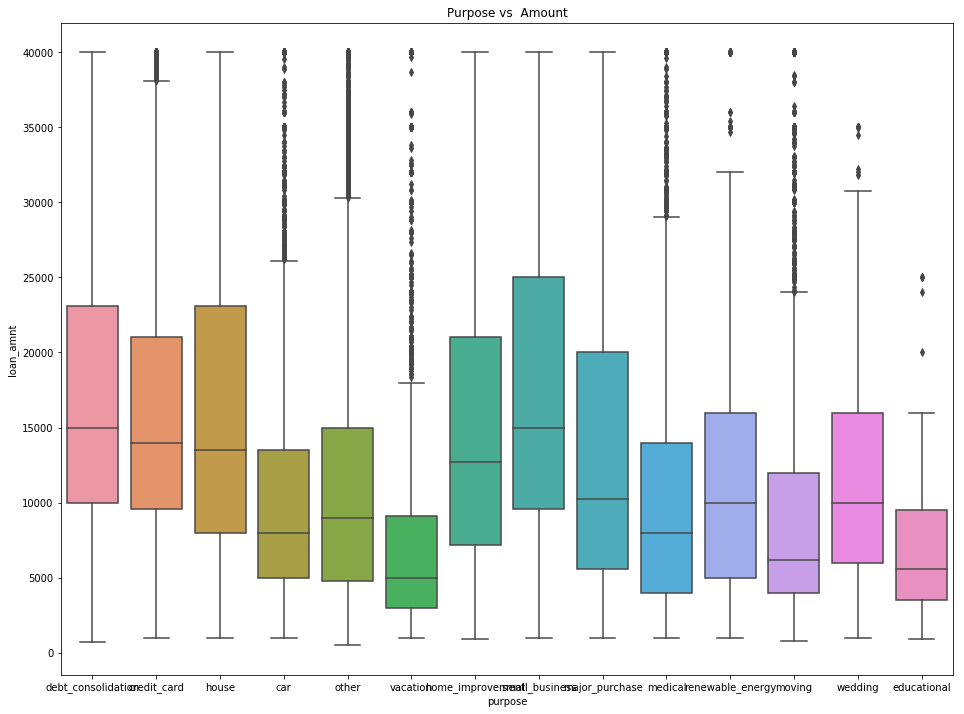

In [39]:
plt.figure(figsize=(16,12))
sns.boxplot(data = data , x='purpose', y='loan_amnt')
plt.title('Purpose vs  Amount')
plt.show()

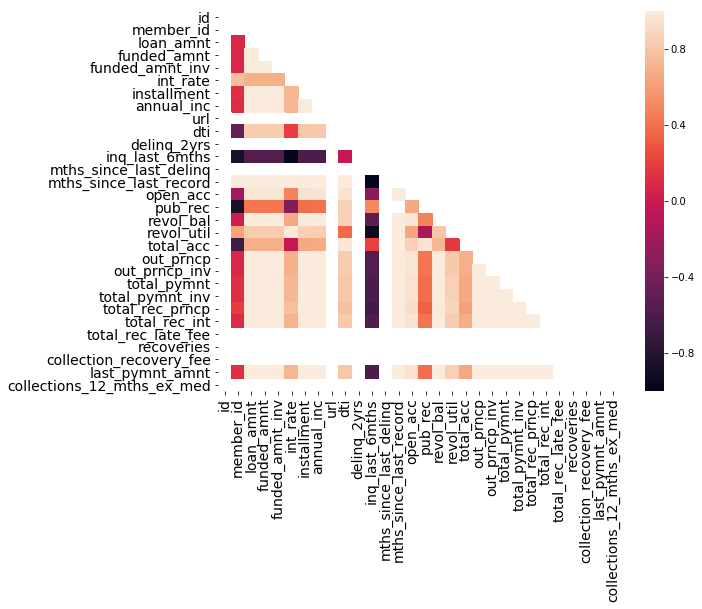

In [51]:
corr = data2.corr()

fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [47]:
### Plan  Baseline
### take for each quarter or month from Dec 2007 ..load in chunks..
#Numerical data
### 
#  Clean numeric data
# remove unwanted columns  ...use intrepetable models only
# check regarding doing this for numeric features dataframe only ....all int and float to numeric
# df = df.apply(to_numeric)
#You could use pd.to_numeric method and apply it for the dataframe with arg coerce.

#df1 = df.apply(pd.to_numeric, args=('coerce',))
#or maybe more appropriately:

#df1 = df.apply(pd.to_numeric, errors='coerce')



#start with logistic regression
# ThenDecision tree
# Then look at RandomForrest
# Then
#

In [115]:
numeric_features = data.select_dtypes(include=[np.number])


In [117]:
numeric_features.shape

(1216728, 116)

In [116]:
numeric_features.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,settlement_amount,settlement_percentage,settlement_term,loan_condition,loan_status_InGracePeriod,loan_status_ChargedOff,loan_status_DMC_ChargedOff,loan_status_current,loan_status_Late31to120days,loan_status_Late16to30days
0,NaN,1,2500,2500,2500.0,13.56,84.92,55000.0,NaN,18.24,...,NaN,NaN,NaN,1,0,0,0,1,0,0
1,NaN,2,30000,30000,30000.0,18.94,777.23,90000.0,NaN,26.52,...,NaN,NaN,NaN,1,0,0,0,1,0,0
2,NaN,3,5000,5000,5000.0,17.97,180.69,59280.0,NaN,10.51,...,NaN,NaN,NaN,1,0,0,0,1,0,0
3,NaN,4,4000,4000,4000.0,18.94,146.51,92000.0,NaN,16.74,...,NaN,NaN,NaN,1,0,0,0,1,0,0
4,NaN,5,30000,30000,30000.0,16.14,731.78,57250.0,NaN,26.35,...,NaN,NaN,NaN,1,0,0,0,1,0,0


In [42]:
numeric_features.dtypes

id                                            float64
member_id                                       int64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
int_rate                                      float64
installment                                   float64
annual_inc                                    float64
url                                           float64
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq                        float64
mths_since_last_record                        float64
open_acc                                      float64
pub_rec                                       float64
revol_bal                                       int64
revol_util                                    float64
total_acc                   

In [ ]:
#  replace XX with 00, to go for nearest location in the state...Do this for NLP model...drop now
#numeric_features.zip_code  = [Str()]

In [118]:
# Renaming of columns
numeric_features = numeric_features.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

In [119]:
Num_1to50col = numeric_features.iloc[:3,:50]

In [105]:
Num_1to50col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 50 columns):
id                             0 non-null float64
member_id                      3 non-null int64
loan_amount                    3 non-null int64
funded_amount                  3 non-null int64
investor_funds                 3 non-null float64
interest_rate                  3 non-null float64
installment                    3 non-null float64
annual_income                  3 non-null float64
url                            0 non-null float64
dti                            3 non-null float64
delinq_2yrs                    3 non-null float64
inq_last_6mths                 3 non-null float64
mths_since_last_delinq         1 non-null float64
mths_since_last_record         2 non-null float64
open_acc                       3 non-null float64
pub_rec                        3 non-null float64
revol_bal                      3 non-null int64
revol_util                     3 non-null float64
total_a

In [126]:
#Num_1to50col.columns

In [120]:
#  Final list for numeric --1 to 50
Numeric_Final_List_from1st50Col = ['member_id', 'loan_amount', 'funded_amount', 'investor_funds',
       'interest_rate', 'installment', 'annual_income',  'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi']

In [ ]:
### 
#Rename list and preproceesing needed inn
##Please refer attached LCDataDictionary_preprocessing.xlsx   ### modified from original

In [121]:
Num_51to109col = numeric_features.iloc[:3,51:109]

In [125]:
#Num_51to109col.columns

In [ ]:
#['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title']

In [124]:
#Num_51to109col.info();

In [122]:
### dropping the following from numeric
numeric_features.drop(['id', 'url'], axis =1, inplace = True)

In [127]:
#numeric_features.columns

In [128]:
#numeric_features['loan_condition'].unique()

array([1, 0])

In [129]:
#numeric_features['loan_condition'].dtypes

In [131]:
# displays the correlation between the features columns and the target.

corr_num = numeric_features.corr()
corr_num['loan_condition'].sort_values(ascending=False)[:40]

loan_status_current                    1.000000
loan_condition                         1.000000
out_prncp                              0.458955
out_prncp_inv                          0.458891
bc_open_to_buy                         0.133688
total_bc_limit                         0.122879
mths_since_recent_inq                  0.100923
total_rev_hi_lim                       0.097185
mo_sin_rcnt_rev_tl_op                  0.087816
mo_sin_rcnt_tl                         0.087654
tot_hi_cred_lim                        0.083213
mths_since_last_record                 0.082383
sec_app_mths_since_last_major_derog    0.074136
mths_since_recent_bc                   0.070199
total_rec_prncp                        0.069089
avg_cur_bal                            0.067110
tot_cur_bal                            0.064215
annual_inc_joint                       0.052824
settlement_percentage                  0.051850
sec_app_mort_acc                       0.049772
max_bal_bc                             0

In [48]:
corr_num['loan_condition'].sort_values(ascending=False)[-20:]

inq_last_12m                  -0.105213
sec_app_inq_last_6mths        -0.105837
revol_util                    -0.109916
bc_util                       -0.122797
num_tl_op_past_12m            -0.125038
percent_bc_gt_75              -0.128054
acc_open_past_24mths          -0.136430
loan_status_InGracePeriod     -0.151491
total_rec_late_fee            -0.153474
inq_last_6mths                -0.166433
hardship_dpd                  -0.220512
loan_status_Late31to120days   -0.238209
interest_rate                 -0.248840
member_id                     -0.281366
collection_recovery_fee       -0.432219
recoveries                    -0.456593
loan_status_ChargedOff        -0.921013
policy_code                         NaN
deferral_term                       NaN
hardship_length                     NaN
Name: loan_condition, dtype: float64

In [134]:
Numeric_Final_List_from1st50Col = ['member_id', 'loan_amount', 
       'interest_rate', 'installment', 'annual_income',  'dti',
       'delinq_2yrs',  'pub_rec', 'revol_bal',
        'total_acc',      
        'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog',  'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 
       'open_acc_6m']

In [138]:
Numeric_Final_List_from50_109 = ['bc_open_to_buy',
        'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
        'total_bc_limit', 'total_il_high_credit_limit',
       'revol_bal_joint']
      

In [141]:
Nummeric_1_109_filt_list = ['member_id', 'loan_amount', 
       'interest_rate', 'installment', 'annual_income',  'dti',
       'delinq_2yrs',  'pub_rec', 'revol_bal',
        'total_acc',      
        'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog',  'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 
       'open_acc_6m',  'bc_open_to_buy',
        'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
        'total_bc_limit', 'total_il_high_credit_limit',
       'revol_bal_joint']

In [ ]:

#numeric_features.policy_code.value_counts().sum()

In [ ]:
#numeric_features.policy_code.isnull().count()

In [ ]:
 #t = numeric_features[numeric_features['policy_code'] == 1]

In [ ]:
#t.policy_code.unique()

In [54]:
numeric_features.deferral_term.value_counts()

3.0    9095
Name: deferral_term, dtype: int64

In [69]:
numeric_features.hardship_length.value_counts()

3.0    9095
Name: hardship_length, dtype: int64

In [ ]:
### for now, retain above 3 columns..

In [142]:
non_numeric_features_holder = data.select_dtypes(exclude=[np.number])

In [ ]:
non_numeric_features_holder.head(5)


In [109]:
non_numeric_features_holder.columns   ## 36 columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [ ]:
##  creating a dataframe for Non_numeric + member_id

In [143]:
Non_num_plus_member_id_col = ['member_id','term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date']

In [144]:
non_numeric_features = data[Non_num_plus_member_id_col]

In [146]:
non_numeric_features.head()

,member_id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,1,36 months,C,C1,Chef,10+ years,RENT,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
1,2,60 months,D,D2,Postmaster,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2,3,36 months,D,D1,Administrative,6 years,MORTGAGE,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
3,4,36 months,D,D2,IT Supervisor,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
4,5,60 months,C,C4,Mechanic,10+ years,MORTGAGE,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN


In [147]:
#len(non_numeric_features.columns)

In [148]:
#non_numeric_features.zip_code.unique();
### when you use NLP model convert XX to 00

In [149]:
#non_numeric_features.title.unique()

In [150]:
#non_numeric_features.purpose.value_counts()
## see what can be combined
## for NLP Change credit_card to credit_card_refinance 

In [96]:
### Purpose having same information as title...use 
### difference in other in both    80067 - 77693  ...very less...to look at deeply for now..
#non_numeric_features.title.value_counts();

In [97]:
non_numeric_features.emp_title.value_counts();
#  Use in NLP model

In [98]:
non_numeric_features.emp_length.value_counts()
### need a dictionary to chnage

10+ years    400071
2 years      109068
< 1 year     106696
3 years       97292
1 year        80160
5 years       74030
4 years       73949
6 years       53452
7 years       45864
8 years       44576
9 years       39742
Name: emp_length, dtype: int64

In [151]:
non_numeric_features.columns

Index(['member_id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [138]:
#non_numeric_features.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [152]:
non_numeric_features.verification_status.replace({'Not Verified':0,'Source Verified':1,'Verified':1}, inplace=True)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [140]:
#non_numeric_features.verification_status_joint.unique()

array([nan, 'Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [153]:
non_numeric_features.verification_status_joint.replace({'Not Verified':0,'Source Verified':1,'Verified':1}, inplace=True)

In [142]:
non_numeric_features.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [154]:
non_numeric_features.home_ownership.replace({'RENT':0,'MORTGAGE':1,'OWN':1,'ANY':1, 'NONE':0, 'OTHER':0 }, inplace=True)

In [144]:
non_numeric_features.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [155]:
non_numeric_features.pymnt_plan.replace({'n':0,'y':1}, inplace=True)

In [146]:
non_numeric_features.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [156]:
#non_numeric_features.initial_list_status.replace({})
#  drop for now
non_numeric_features.drop('initial_list_status',axis =1, inplace = True)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
#non_numeric_features['Issued_date'] = pd.to_datetime(non_numeric_features['issue_d'])

In [109]:
#non_numeric_features['Issued_date'].head(5)

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: Issued_date, dtype: datetime64[ns]

In [157]:
Year_series = pd.to_datetime(non_numeric_features['issue_d'])


In [158]:
non_numeric_features['year'] = Year_series.dt.year

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
len(non_numeric_features.columns)

37

In [122]:
non_numeric_features['year'].count()

1216728

In [135]:
non_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216728 entries, 0 to 2260667
Data columns (total 33 columns):
term                         1216728 non-null object
grade                        1216728 non-null object
sub_grade                    1216728 non-null object
emp_length                   1124900 non-null object
home_ownership               1216728 non-null object
verification_status          1216728 non-null object
issue_d                      1216728 non-null object
loan_status                  1216728 non-null object
pymnt_plan                   1216728 non-null object
purpose                      1216728 non-null object
addr_state                   1216728 non-null object
earliest_cr_line             1216725 non-null object
initial_list_status          1216728 non-null object
last_pymnt_d                 1214302 non-null object
next_pymnt_d                 955073 non-null object
last_credit_pull_d           1216702 non-null object
application_type             1216728 non

In [160]:
### UNCOMMENT THIS AND RUN
non_numeric_features.application_type.replace({'Individual':1,'Joint App':2}, inplace=True)

In [165]:
#non_numeric_features.hardship_flag.replace({'N': 0,'Y':1 },inplace = True)
non_numeric_features.hardship_flag.unique()

array([0, 1])

In [162]:
non_numeric_features.debt_settlement_flag.replace({'N': 0,'Y':1 },inplace = True)


In [166]:
non_numeric_features.debt_settlement_flag.unique()

array([0, 1])

In [48]:
non_numeric_features['grade'].unique()

array(['C', 'D', 'B', 'A', 'E', 'F', 'G', nan], dtype=object)

## Credit score
#credit_scores
<a id="#credit_scores"></a>

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0, 0.5, 'Interest Rate (%)')

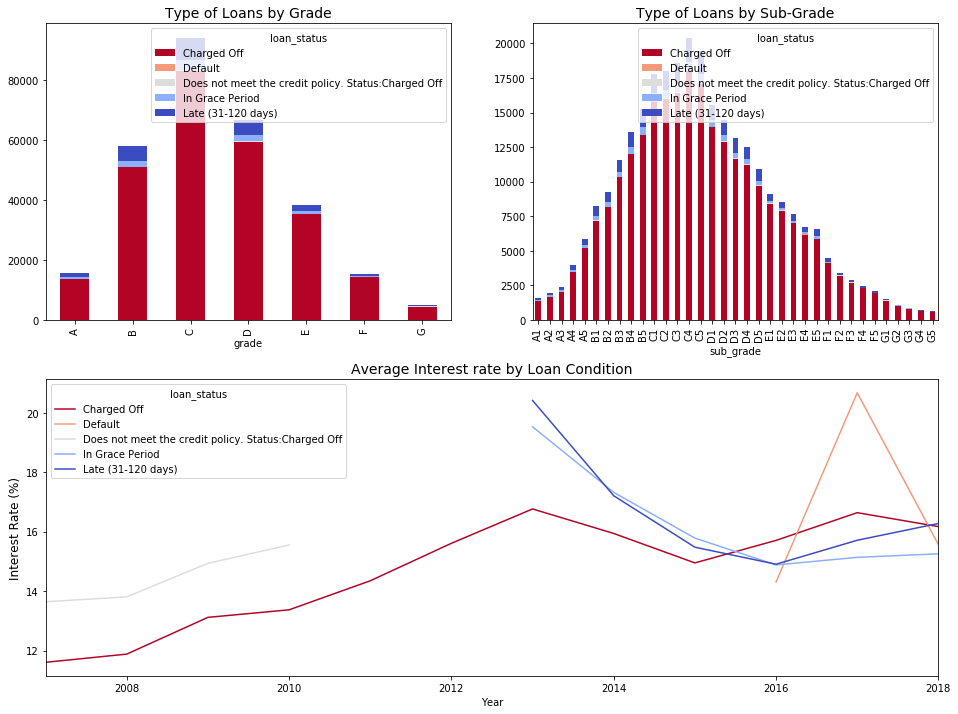

In [74]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = default.groupby(['grade', 'loan_status']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = default.groupby(['sub_grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

DF_Year_series = pd.to_datetime(default['issue_d'])
default['Year']= DF_Year_series.dt.year

by_interest = default.groupby(['Year', 'loan_status']).int_rate.mean()

by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)


In [167]:
#### lowest grade for credit is G ..highest is A
non_numeric_features['grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}, inplace = True)
non_numeric_features['sub_grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}, inplace = True)

In [138]:
non_numeric_features.grade.unique()

array([3, 4, 2, 1, 5, 6, 7])

In [139]:
non_numeric_features.loan_status.unique()

array(['Current', 'Late (31-120 days)', 'In Grace Period', 'Charged Off',
       'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [168]:
non_numeric_features['loan_status'].replace({'Current':1,'Late (16-30 days)':2,'Late (31-120 days)':3,'In Grace Period':4,'Does not meet the credit policy. Status:Charged Off':5,'Charged Off':6,'Default':7}, inplace = True)

In [141]:
non_numeric_features.loan_status.unique()

array([1, 3, 4, 6, 2, 7, 5])

In [169]:
non_numeric_features.emp_length.replace({'< 1 year':0.5,'1 year':1,'2 years':2,'3 years':3 ,
                                         '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8,'9 years':9,'10+ years':10}, inplace = True)

In [52]:
non_numeric_features.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [ ]:


#Remove all rows where the specified column is +/- sd standard deviations
#def remove_outliers(df, name, sd):
#    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
#                          >= (sd * df[name].std()))]
#    df.drop(drop_rows, axis=0, inplace=True)

In [170]:
Drop_from_non_numeric_list = [ 'emp_title', 'desc', 'zip_code', 'title'] 

In [171]:
non_numeric_features.drop(Drop_from_non_numeric_list, axis =1, inplace = True)


## Getting data ready for modeling

In [98]:
#non_numeric_features.info();

In [172]:
#data.select_dtypes(include=[np.number])
non_numeric_temp = non_numeric_features.select_dtypes(include = [np.number])

In [173]:
non_numeric_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216728 entries, 0 to 2260667
Data columns (total 12 columns):
member_id                    1216728 non-null int64
grade                        1216728 non-null int64
emp_length                   1124900 non-null float64
home_ownership               1216728 non-null int64
verification_status          1216728 non-null int64
loan_status                  1216728 non-null int64
pymnt_plan                   1216728 non-null int64
application_type             1216728 non-null int64
verification_status_joint    98349 non-null float64
hardship_flag                1216728 non-null int64
debt_settlement_flag         1216728 non-null int64
year                         1216728 non-null int64
dtypes: float64(2), int64(10)
memory usage: 120.7 MB


In [174]:
non_numeric_temp.shape

(1216728, 12)

In [178]:
non_numeric_temp

,member_id,grade,emp_length,home_ownership,verification_status,pymnt_plan,application_type,verification_status_joint,hardship_flag,debt_settlement_flag,year
0,1,5,10.0,0,0,0,1,NaN,0,0,2018
1,2,4,10.0,1,1,0,1,NaN,0,0,2018
2,3,4,6.0,1,1,0,1,NaN,0,0,2018
3,4,4,10.0,1,1,0,1,NaN,0,0,2018
4,5,5,10.0,1,0,0,1,NaN,0,0,2018
5,6,5,10.0,1,0,0,1,NaN,0,0,2018
6,7,4,4.0,0,1,0,1,NaN,0,0,2018
7,8,5,10.0,0,1,0,1,NaN,0,0,2018
8,9,4,10.0,1,1,0,1,NaN,0,0,2018
9,10,5,0.5,1,0,0,1,NaN,0,0,2018


In [179]:
cols_with_na_non_numeric_temp = non_numeric_temp.isnull().sum().sort_values(ascending=False)[:25]

cols_with_na_non_numeric_temp

verification_status_joint    1118379
emp_length                     91828
year                               0
debt_settlement_flag               0
hardship_flag                      0
application_type                   0
pymnt_plan                         0
verification_status                0
home_ownership                     0
grade                              0
member_id                          0
dtype: int64

In [180]:
non_numeric_temp_drop_list = ['verification_status_joint','emp_length' ]

In [182]:
#non_numeric_temp.drop('loan_status',axis =1, inplace = True)

In [183]:
#  UNCOMMENT  OUT AND RUN
non_numeric_temp.drop(non_numeric_temp_drop_list,axis =1, inplace = True)

In [184]:
non_numeric_temp

,member_id,grade,home_ownership,verification_status,pymnt_plan,application_type,hardship_flag,debt_settlement_flag,year
0,1,5,0,0,0,1,0,0,2018
1,2,4,1,1,0,1,0,0,2018
2,3,4,1,1,0,1,0,0,2018
3,4,4,1,1,0,1,0,0,2018
4,5,5,1,0,0,1,0,0,2018
5,6,5,1,0,0,1,0,0,2018
6,7,4,0,1,0,1,0,0,2018
7,8,5,0,1,0,1,0,0,2018
8,9,4,1,1,0,1,0,0,2018
9,10,5,1,0,0,1,0,0,2018


In [185]:
cols_with_na_non_numeric_temp = non_numeric_temp.isnull().sum().sort_values(ascending=False)[:40]
cols_with_na_non_numeric_temp

year                    0
debt_settlement_flag    0
hardship_flag           0
application_type        0
pymnt_plan              0
verification_status     0
home_ownership          0
grade                   0
member_id               0
dtype: int64

In [186]:
numeric_features.shape

(1216728, 114)

In [334]:
#

In [ ]:
#cols_with_na_numeric_temp_drop_na_list = ['orig_projected_additional_accrued_interest','hardship_last_payment_amount']

In [239]:
numeric_features.columns

Index(['member_id', 'loan_amount', 'funded_amount', 'investor_funds',
       'interest_rate', 'installment', 'annual_income', 'dti', 'delinq_2yrs',
       'inq_last_6mths',
       ...
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'loan_condition', 'loan_status_InGracePeriod', 'loan_status_ChargedOff',
       'loan_status_DMC_ChargedOff', 'loan_status_current',
       'loan_status_Late16to30days', 'loan_status_Late31to120days'],
      dtype='object', length=114)

In [189]:

Numeric_1_109_filt_list_Plus_Additions = ['member_id', 'loan_amount', 
       'interest_rate', 'installment', 'annual_income',  'dti',
       'delinq_2yrs',  'pub_rec', 'revol_bal',
        'total_acc',      
        'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog',  'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 
       'open_acc_6m',  'bc_open_to_buy',
        'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
        'total_bc_limit', 'total_il_high_credit_limit',
       'revol_bal_joint','loan_condition', 'loan_status_InGracePeriod', 'loan_status_ChargedOff',
       'loan_status_DMC_ChargedOff', 'loan_status_current',
       'loan_status_Late16to30days', 'loan_status_Late31to120days']

## added loan_status also

#Additions = ['loan_condition', 'loan_status_InGracePeriod', 'loan_status_ChargedOff',
#       'loan_status_DMC_ChargedOff', 'loan_status_current',
#       'loan_status_Late16to30days', 'loan_status_Late31to120days','year']


In [190]:
numeric_features_temp = numeric_features[Numeric_1_109_filt_list_Plus_Additions]

In [191]:
numeric_features_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216728 entries, 0 to 2260667
Data columns (total 34 columns):
member_id                      1216728 non-null int64
loan_amount                    1216728 non-null int64
interest_rate                  1216728 non-null float64
installment                    1216728 non-null float64
annual_income                  1216728 non-null float64
dti                            1215267 non-null float64
delinq_2yrs                    1216725 non-null float64
pub_rec                        1216725 non-null float64
revol_bal                      1216728 non-null int64
total_acc                      1216725 non-null float64
recoveries                     1216728 non-null float64
last_pymnt_amnt                1216728 non-null float64
collections_12_mths_ex_med     1216700 non-null float64
mths_since_last_major_derog    313907 non-null float64
annual_inc_joint               103202 non-null float64
dti_joint                      103200 non-null float64


In [192]:
cols_with_na_numeric_features_temp = numeric_features_temp.isnull().sum().sort_values(ascending=False)[:25]

cols_with_na_numeric_features_temp 

revol_bal_joint                1121166
dti_joint                      1113528
annual_inc_joint               1113526
mths_since_last_major_derog     902821
open_acc_6m                     207952
bc_open_to_buy                   22046
total_il_high_credit_limit       11079
tot_hi_cred_lim                  11079
total_bc_limit                    7647
dti                               1461
pub_rec_bankruptcies               334
collections_12_mths_ex_med          28
chargeoff_within_12_mths            28
tax_liens                           11
pub_rec                              3
delinq_2yrs                          3
acc_now_delinq                       3
delinq_amnt                          3
total_acc                            3
annual_income                        0
installment                          0
interest_rate                        0
loan_amount                          0
revol_bal                            0
loan_status_Late31to120days          0
dtype: int64

In [193]:
#1   numericfeatures where NaN values have no meaning..
cols_fill_numeric_na_features_temp = ['revol_bal_joint','dti_joint','annual_inc_joint',
                                     'mths_since_last_major_derog','open_acc_6m',
                                     'bc_open_to_buy', 'total_il_high_credit_limit',       
                                        'tot_hi_cred_lim',                 
                                        'total_bc_limit',                   
                                        'dti' ,                             
                                        'pub_rec_bankruptcies',              
                                         'collections_12_mths_ex_med' ,         
                                        'chargeoff_within_12_mths' ,           
                                            'tax_liens' ,                          
                                            'pub_rec' ,                            
                                         'acc_now_delinq' ,                
                                            'delinq_amnt' ,
                                            'total_acc',
                                            'delinq_2yrs'  ]                                   
                                     
                                     
                                     
                                     
                                     
                                     
                                     
                                   

 

In [194]:
# replace 'NaN' with 0 in these columns
for col in cols_fill_numeric_na_features_temp:
    numeric_features_temp[col].fillna(0,inplace=True)   

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


hardship_type                1207633
hardship_loan_status         1207633
hardship_reason              1207633
hardship_status              1207633
hardship_end_date            1207633
payment_plan_start_date      1207633
hardship_start_date          1207633
debt_settlement_flag_date    1183676
settlement_status            1183676
settlement_date              1183676
sec_app_earliest_cr_line     1121166
verification_status_joint    1118379
next_pymnt_d                  261655
emp_length                     91828
last_pymnt_d                    2426
last_credit_pull_d                26
earliest_cr_line                   3

In [195]:
numeric_features_temp.member_id.unique()

array([      1,       2,       3, ..., 2260666, 2260667, 2260668])

In [196]:
numeric_features_temp.shape

(1216728, 34)

In [ ]:
#For data imbalance problems, mostly handled in three steps.

#Over-sample the minority class.
#Under-sample the majority class.
#Synthesize new minority classes.
#SMOTE (Synthetic Minority Over-sampling TEchnique) is coming under the third step. 
#It’s the process of creating a new minority classes from the datasets.

In [68]:
numeric_features_temp['loan_condition'].unique()

array([ 1.,  0., nan])

In [69]:
numeric_features_temp['loan_condition'].value_counts()

1.0    919695
0.0    297033
Name: loan_condition, dtype: int64

In [197]:
#numeric_features_temp['loan_condition'].isnull().count

In [77]:
#Drop_list = ['loan_status_InGracePeriod','loan_status_ChargedOff','loan_status_DMC_ChargedOff','loan_status_current']
#numeric_features_temp.drop(labels = Drop_list,axis = 0, inplace = True)

In [198]:
##ADD both together ..
###on member_id..and axis = 1,
#new_df = pd.merge(df1, df2, on='employee')
numeric_features_temp

,member_id,loan_amount,interest_rate,installment,annual_income,dti,delinq_2yrs,pub_rec,revol_bal,total_acc,...,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,loan_condition,loan_status_InGracePeriod,loan_status_ChargedOff,loan_status_DMC_ChargedOff,loan_status_current,loan_status_Late16to30days,loan_status_Late31to120days
0,1,2500,13.56,84.92,55000.0,18.24,0.0,1.0,4341,34.0,...,36500.0,18124.0,0.0,1,0,0,0,1,0,0
1,2,30000,18.94,777.23,90000.0,26.52,0.0,1.0,12315,44.0,...,15000.0,94072.0,0.0,1,0,0,0,1,0,0
2,3,5000,17.97,180.69,59280.0,10.51,0.0,0.0,4599,13.0,...,13800.0,10000.0,0.0,1,0,0,0,1,0,0
3,4,4000,18.94,146.51,92000.0,16.74,0.0,0.0,5468,13.0,...,5000.0,44984.0,0.0,1,0,0,0,1,0,0
4,5,30000,16.14,731.78,57250.0,26.35,0.0,0.0,829,26.0,...,9300.0,32332.0,0.0,1,0,0,0,1,0,0
5,6,5550,15.02,192.45,152500.0,37.94,0.0,0.0,53854,44.0,...,65900.0,203159.0,0.0,1,0,0,0,1,0,0
6,7,2000,17.97,72.28,51000.0,2.40,0.0,0.0,0,9.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
7,8,6000,13.56,203.79,65000.0,30.10,0.0,0.0,38476,37.0,...,33100.0,61742.0,0.0,1,0,0,0,1,0,0
8,9,5000,17.97,180.69,53580.0,21.16,0.0,0.0,8018,38.0,...,21500.0,34626.0,0.0,1,0,0,0,1,0,0
9,10,6000,14.47,206.44,300000.0,17.43,1.0,0.0,65950,58.0,...,98300.0,89600.0,0.0,1,0,0,0,1,0,0


In [199]:
Combined = pd.merge(numeric_features_temp,non_numeric_temp,on = 'member_id')

In [200]:
Combined.shape

(1216728, 42)

In [ ]:
# check regarding doing this for numeric features dataframe only ....all int and float to numeric
# df = df.apply(to_numeric)

In [252]:
### converting Combined to numeric
##Combined = Combined.apply(to_numeric)
##

In [201]:
Combined.to_csv('Combined.csv',sep = ',')

In [204]:
Combined.head(5)

,member_id,loan_amount,interest_rate,installment,annual_income,dti,delinq_2yrs,pub_rec,revol_bal,total_acc,...,loan_status_Late16to30days,loan_status_Late31to120days,grade,home_ownership,verification_status,pymnt_plan,application_type,hardship_flag,debt_settlement_flag,year
0,1,2500,13.56,84.92,55000.0,18.24,0.0,1.0,4341,34.0,...,0,0,5,0,0,0,1,0,0,2018
1,2,30000,18.94,777.23,90000.0,26.52,0.0,1.0,12315,44.0,...,0,0,4,1,1,0,1,0,0,2018
2,3,5000,17.97,180.69,59280.0,10.51,0.0,0.0,4599,13.0,...,0,0,4,1,1,0,1,0,0,2018
3,4,4000,18.94,146.51,92000.0,16.74,0.0,0.0,5468,13.0,...,0,0,4,1,1,0,1,0,0,2018
4,5,30000,16.14,731.78,57250.0,26.35,0.0,0.0,829,26.0,...,0,0,5,1,0,0,1,0,0,2018


In [254]:
### dropping of columns from combined
#funded_amount and investor funds --collinear with loan_amount
#combined_list_drop = ['funded_amount','investor_funds' ]

In [255]:
#Combined.drop(combined_list_drop,axis =1, inplace =True)


In [154]:
Combined.shape

(1216728, 43)

In [214]:
### standardising

#from sklearn.preprocessing import RobustScaler
#RS = RobustScaler()
#RS.fit_transform(Combined)

In [215]:
#Combined

## Train

In [155]:
Combined.year.unique()

array([2018, 2016, 2015, 2017, 2013, 2012, 2014, 2011, 2010, 2009, 2008,
       2007])

In [156]:
Combined.year.dtypes

dtype('int64')

In [205]:
### 2007 - 2015
train_year_filter = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

In [206]:
Combined_Train = Combined[Combined['year'].isin(train_year_filter)]

In [216]:
Combined_Train

,member_id,loan_amount,interest_rate,installment,annual_income,dti,delinq_2yrs,pub_rec,revol_bal,total_acc,...,loan_status_Late16to30days,loan_status_Late31to120days,grade,home_ownership,verification_status,pymnt_plan,application_type,hardship_flag,debt_settlement_flag,year
455002,495243,8000,12.79,268.75,95000.0,10.30,0.0,1.0,11343,30.0,...,0,0,5,1,1,0,1,0,0,2016
455003,495244,20000,17.99,507.76,66000.0,12.62,2.0,1.0,3565,25.0,...,0,0,4,1,0,0,1,0,0,2016
455004,495249,18000,8.59,568.97,62000.0,19.60,1.0,0.0,7917,27.0,...,0,0,7,0,1,0,1,0,0,2016
455005,495251,15000,12.79,503.90,45000.0,24.75,0.0,0.0,13514,18.0,...,0,0,5,1,0,0,1,0,0,2016
455006,495252,2000,11.49,65.95,40000.0,10.03,0.0,0.0,3910,17.0,...,0,0,6,0,1,0,1,0,0,2016
455007,495254,20000,6.99,617.46,110000.0,16.91,0.0,1.0,24193,27.0,...,0,0,7,0,1,0,1,0,0,2016
455008,495255,26000,14.49,894.82,108329.0,26.75,1.0,0.0,12300,30.0,...,0,0,5,0,0,0,1,0,0,2016
455009,495257,12000,26.49,362.78,50000.0,15.22,0.0,1.0,3276,17.0,...,0,0,2,0,1,0,1,0,0,2016
455010,495258,10000,16.99,356.48,101000.0,7.84,3.0,0.0,9149,21.0,...,0,0,4,1,0,0,1,0,0,2016
455011,495259,20000,16.99,712.96,120000.0,20.41,0.0,0.0,24373,15.0,...,0,0,4,1,0,0,1,0,0,2016


In [208]:
Combined_Train.year.unique()

array([2016, 2015, 2017, 2013, 2012, 2014, 2011, 2010, 2009, 2008, 2007])

In [209]:
Combined_Train['loan_condition'].unique()

array([1, 0])

In [217]:
y_train = Combined_Train['loan_condition'].values

In [218]:
y_train.shape

(761726,)

In [164]:
#y_train.shape = (761726,1)

In [195]:
y_train.dtype

dtype('int64')

In [219]:
Combined_Train_temp = Combined_Train

In [220]:
Combined_Train_temp.drop('loan_condition',axis =1,inplace = True)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [221]:
X_train = Combined_Train_temp.values

In [222]:
X_train

array([[4.952430e+05, 8.000000e+03, 1.279000e+01, ..., 0.000000e+00,
        0.000000e+00, 2.016000e+03],
       [4.952440e+05, 2.000000e+04, 1.799000e+01, ..., 0.000000e+00,
        0.000000e+00, 2.016000e+03],
       [4.952490e+05, 1.800000e+04, 8.590000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.016000e+03],
       ...,
       [2.260666e+06, 1.000000e+04, 1.199000e+01, ..., 0.000000e+00,
        0.000000e+00, 2.017000e+03],
       [2.260667e+06, 1.200000e+04, 2.145000e+01, ..., 0.000000e+00,
        0.000000e+00, 2.017000e+03],
       [2.260668e+06, 1.655000e+04, 2.145000e+01, ..., 0.000000e+00,
        0.000000e+00, 2.017000e+03]])

In [223]:
X_train.shape

(761726, 41)

In [463]:
#X_train
##
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

In [224]:
X_train.dtype

dtype('float64')

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [173]:
y_train.dtype

dtype('int64')

## Test batch

In [225]:
#2016 -2018
test_year_filter = [2018]

In [226]:
Combined_Test = Combined[Combined['year'].isin(test_year_filter)]

In [227]:
Combined_Test.year.unique()

array([2018])

In [228]:
y_test = Combined_Test['loan_condition'].values

In [206]:
y_test.shape

(455002,)

In [179]:
#y_test.shape = (455002,1)

In [229]:
Combined_Test_temp = Combined_Test 

In [230]:
Combined_Test_temp.drop('loan_condition', axis =1, inplace = True)

In [231]:
X_test = Combined_Test_temp.values

In [232]:
X_test.shape

(455002, 41)

In [233]:
cols_with_na_Combined = Combined.isnull().sum().sort_values(ascending=False)[:25]

cols_with_na_Combined 

year                           0
recoveries                     0
bc_open_to_buy                 0
open_acc_6m                    0
acc_now_delinq                 0
dti_joint                      0
annual_inc_joint               0
mths_since_last_major_derog    0
collections_12_mths_ex_med     0
last_pymnt_amnt                0
total_acc                      0
debt_settlement_flag           0
revol_bal                      0
pub_rec                        0
delinq_2yrs                    0
dti                            0
annual_income                  0
installment                    0
interest_rate                  0
loan_amount                    0
chargeoff_within_12_mths       0
delinq_amnt                    0
pub_rec_bankruptcies           0
tax_liens                      0
hardship_flag                  0
dtype: int64

In [442]:
#y_test_ss = StandardScaler()
#y_test = sc.fit_transform(y_test)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [141]:
#X_test_ss = StandardScaler()
#X_test = sc.fit_transform(X_test)
### don't do this..do it once with  full X ..


In [234]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [235]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [236]:
print('Logreg intercept:', logreg.intercept_)
print('Logreg coef(s):', logreg.coef_)
#print('Logreg predicted probabilities:', logreg.predict_proba(X[0:5,:]))

Logreg intercept: [1.32218645e-07]
Logreg coef(s): [[ 6.24197190e-08  3.91196544e-05 -3.00792314e-04 -1.86836285e-03
   3.11509826e-06 -1.71220702e-04  1.26423511e-06 -4.65261213e-06
  -3.74642373e-06 -3.99958817e-04 -9.74972726e-03  1.11597519e-06
   2.28168881e-07 -4.33165396e-05  6.74550063e-06  7.74223101e-06
   7.42279651e-09  1.61802269e-05  3.15315198e-06 -6.23439713e-08
   1.28024548e-05 -4.10256991e-06  1.95483087e-07  9.01039216e-07
   1.18650217e-05  3.89657364e-07 -1.53186197e-06 -7.69142482e-06
  -1.35270360e-04 -5.70019969e-07  1.66220086e-04 -3.07225274e-06
  -1.94564209e-05  8.53118980e-05  3.39554196e-06 -1.14477437e-05
  -7.33830496e-07  8.86243228e-07 -9.50614382e-07 -1.29632966e-05
   4.38542744e-04]]


In [237]:
print('Logreg predicted probabilities:', logreg.predict_proba(X_test))

Logreg predicted probabilities: [[0.17339598 0.82660402]
 [0.1965142  0.8034858 ]
 [0.22561516 0.77438484]
 ...
 [0.20987245 0.79012755]
 [0.16819849 0.83180151]
 [0.25311416 0.74688584]]


In [238]:
print('Logreg predicted probabilities:', logreg.predict(X_test))

Logreg predicted probabilities: [1 1 1 ... 1 1 1]


In [245]:
y_pred = logreg.predict(X_test)

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.05      0.10     17684
           1       0.96      1.00      0.98    437318

   micro avg       0.96      0.96      0.96    455002
   macro avg       0.98      0.53      0.54    455002
weighted avg       0.96      0.96      0.95    455002



In [251]:
#print(confusion_matrix(y_test,y_pred,labels = ['Actual','Predicted'])
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion)

Predicted    0       1     All
Actual                        
0          944   16740   17684
1           10  437308  437318
All        954  454048  455002


In [255]:
#print(confusion_matrix(y_test,y_pred,labels = ['y_test','y_pred']))

In [241]:
LOGREG_Scores = cross_val_score(logreg, X_train, y_train, cv =5)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_mod

In [242]:
LOGREG_Scores

array([0.84344847, 0.85244115, 0.85510519, 0.83462536, 0.85201911])

In [243]:
print(np.mean(LOGREG_Scores))

0.8475278560234927


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
### baseline is len(Default rows)/total rows * 100

In [256]:
#using decision tree
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
regressor = DecisionTreeRegressor()


In [257]:
regressor.fit(X_train, y_train)
#classifier.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [258]:
prediction_DTreg = regressor.predict(X_test)
#prediction = classifier.predict(X_test)

In [229]:
prediction_DTreg

array([1., 1., 1., ..., 1., 1., 1.])

In [230]:
print(y_test)

[1 1 1 ... 1 1 1]
